In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as pyplot

datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\David Adebisi\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Jan  4 16:21:50 2025).


In [3]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


<Axes: xlabel='job_country'>

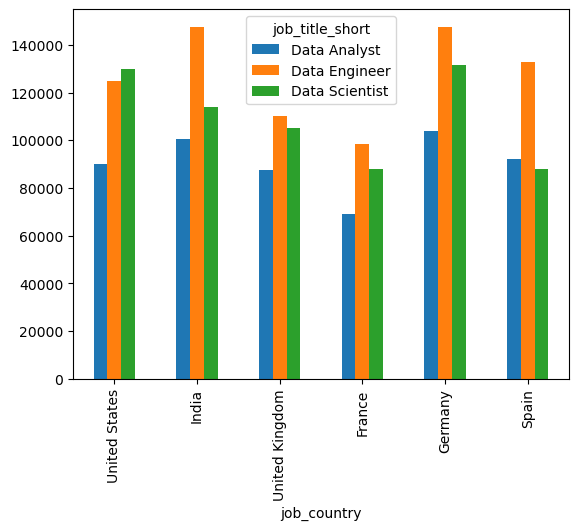

In [4]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')

In [5]:
df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
23341,Data Scientist,Data Scientist,"London, UK",via Jora UK,Full-time,False,United Kingdom,2023-12-17 13:12:51,False,False,United Kingdom,None,NaN,NaN,Adria Solutions Ltd,"['sql', 'python', 'databricks', 'azure', 'exce...","{'analyst_tools': ['excel', 'tableau', 'altery..."
746563,Data Scientist,"Data Scientist, Jr.","Tampa, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-02-09 20:06:03,False,True,United States,None,NaN,NaN,Alta Mira,"['aws', 'tensorflow', 'pytorch', 'scikit-learn']","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
624114,Data Engineer,Data Engineer,"Zürich, Switzerland",via Trabajo.org,Full-time,False,Switzerland,2023-02-25 13:03:34,False,False,Switzerland,None,NaN,NaN,Cembra,"['sql', 'oracle']","{'cloud': ['oracle'], 'programming': ['sql']}"
745778,Senior Data Engineer,IT Senior Engineer Data Quality,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-04-03 20:43:21,True,False,Singapore,None,NaN,NaN,Soitec,['sql'],{'programming': ['sql']}
75831,Data Engineer,Data Engineer,California,via Jobs On TechSpot,Full-time,False,"Florida, United States",2023-02-20 00:11:01,False,True,United States,None,NaN,NaN,Autodesk,"['sql', 'python', 'java', 'c++', 'scala', 'aws...","{'analyst_tools': ['power bi', 'looker'], 'clo..."


In [6]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [7]:
df.index.name = 'job_index'

In [8]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [9]:
df.index.dtype

dtype('int64')

In [10]:
df_usa = df[df['job_country']== 'United States']
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [11]:
df_usa.reset_index(inplace=True)
df_usa

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [12]:
df_usa.set_index('job_index', inplace=True)

In [13]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [14]:
median_pivot = df_usa.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc=['median', 'min', 'max'])

In [15]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,90000.0,35000.0,387460.0
Cloud Engineer,116100.0,42000.0,221844.0
Data Analyst,90000.0,25000.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Data Scientist,130000.0,30000.0,960000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Analyst,110000.0,35360.0,425000.0
Senior Data Engineer,150000.0,45000.0,375000.0


In [16]:
median_pivot.sort_values(by=('median', 'salary_year_avg'), ascending=False)

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,155000.0,55000.0,475000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Engineer,150000.0,45000.0,375000.0
Data Scientist,130000.0,30000.0,960000.0
Software Engineer,130000.0,48982.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Cloud Engineer,116100.0,42000.0,221844.0
Senior Data Analyst,110000.0,35360.0,425000.0


In [17]:
median_pivot.sort_index(inplace=True)

In [18]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,90000.0,35000.0,387460.0
Cloud Engineer,116100.0,42000.0,221844.0
Data Analyst,90000.0,25000.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Data Scientist,130000.0,30000.0,960000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Analyst,110000.0,35360.0,425000.0
Senior Data Engineer,150000.0,45000.0,375000.0


In [19]:
#Exercise
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

C:\Users\David Adebisi\AppData\Local\Temp\ipykernel_5156\4105379985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')


In [20]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size' )

In [21]:
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

In [22]:
df_usa_pivot.sort_values('month_no', inplace = True)

In [23]:
df_usa_pivot.set_index('job_posted_month', inplace=True)

In [24]:
df_usa_pivot.drop(columns='month_no', inplace=True)

In [25]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

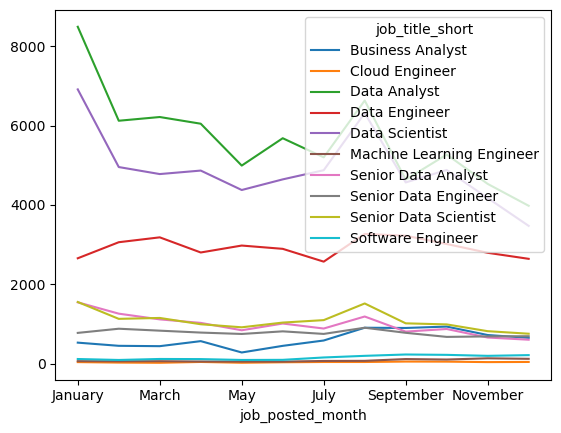

In [26]:
df_usa_pivot.plot(kind='line')

In [27]:
top_3 = df_usa['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

In [28]:
print(df_usa_pivot.columns)


Index(['Business Analyst', 'Cloud Engineer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Machine Learning Engineer', 'Senior Data Analyst',
       'Senior Data Engineer', 'Senior Data Scientist', 'Software Engineer'],
      dtype='object', name='job_title_short')


In [29]:
print(top_3)

['Data Analyst', 'Data Scientist', 'Data Engineer']


<Axes: xlabel='job_posted_month'>

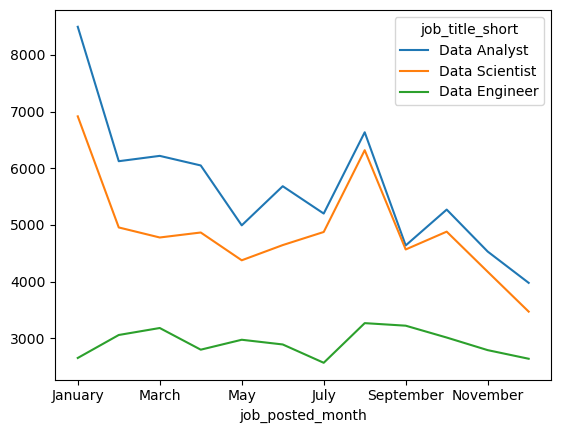

In [30]:

df_usa_pivot[top_3].plot(kind='line')  # If `top_3` refers to index values.


In [31]:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [33]:
df_US_merged = df_usa_pivot.merge(df_US_software_pivot, on="job_posted_month")

In [38]:
top_5 = df_US_merged.sum().sort_values(ascending=False).head().index.to_list()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

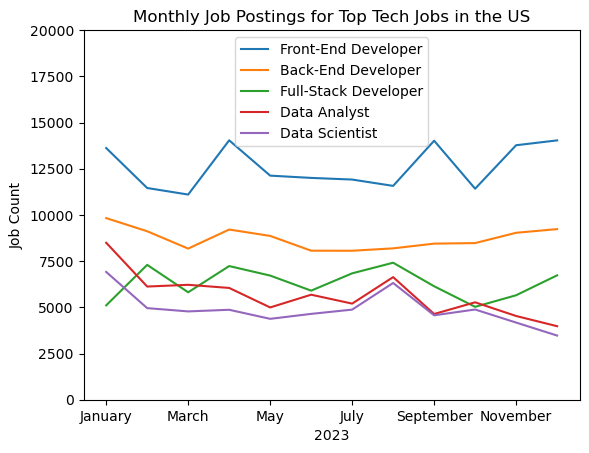

In [42]:
import matplotlib.pyplot as plt


df_US_merged[top_5].plot(kind="line")
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()